In [53]:
#!pip install opencv-python
#!pip install opencv_contrib_python
#!pip install --upgrade pip setuptools wheel

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
%cd /content/drive/MyDrive/python-opencv-course-master

/content/drive/MyDrive/python-opencv-course-master


## Color

In [57]:
img = cv2.imread('./DATA/00-puppy.jpg')

In [58]:
print(img.shape)

(1300, 1950, 3)


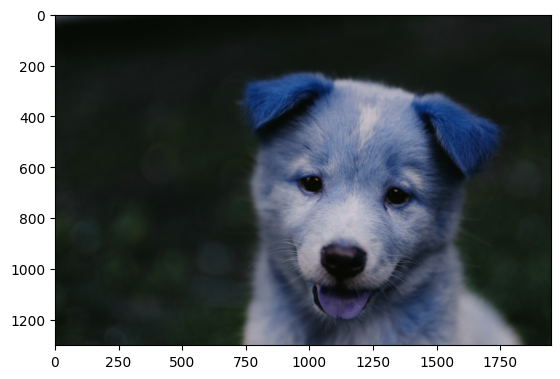

In [59]:
plt.imshow(img)

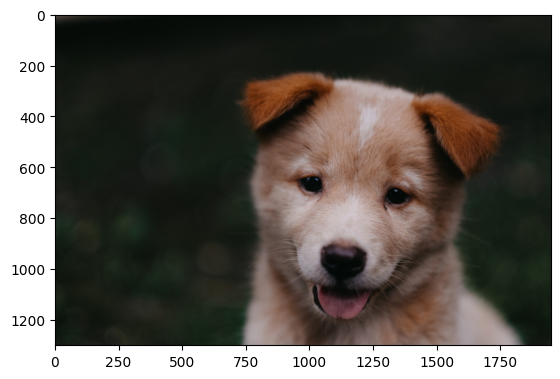

In [60]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

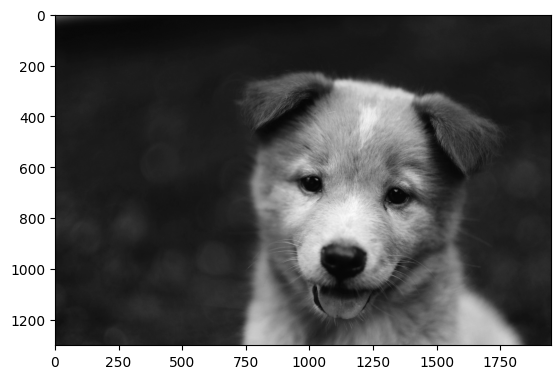

In [61]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap="gray")

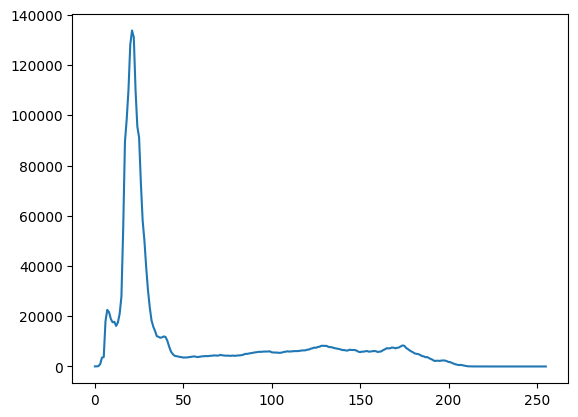

In [62]:
hist_values = cv2.calcHist([img], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist_values)

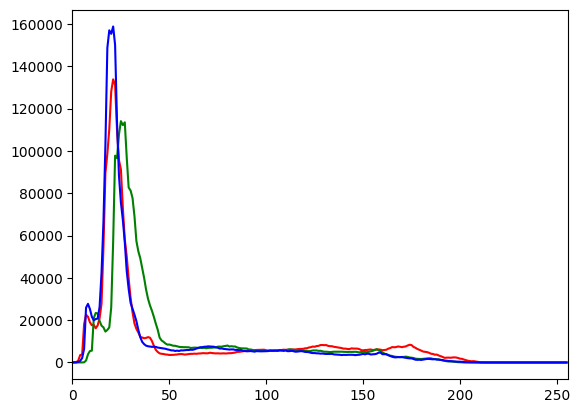

In [63]:
color = ('r','g','b')

for i,col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])

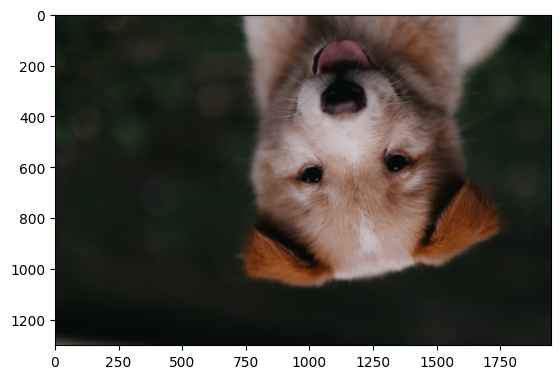

In [64]:
output = cv2.flip(img, 0)    # 0上下翻轉, 1左右翻轉, -1上下左右翻轉
plt.imshow(output)

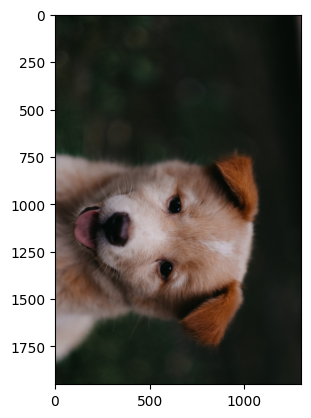

In [65]:
output_ROTATE_90_CLOCKWISE = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(output_ROTATE_90_CLOCKWISE)

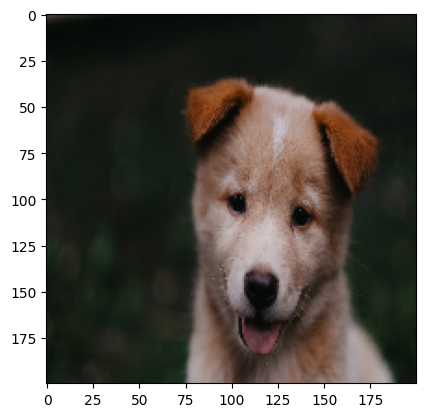

In [66]:
output_1 = cv2.resize(img, (200, 200))   # 產生 200x200 的圖
plt.imshow(output_1)

## BLUR

In [67]:
import numpy as np

In [68]:
img = cv2.imread('DATA/bricks.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [69]:
kernel = np.ones(shape=(5,5), dtype=np.float32)/25

In [70]:
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

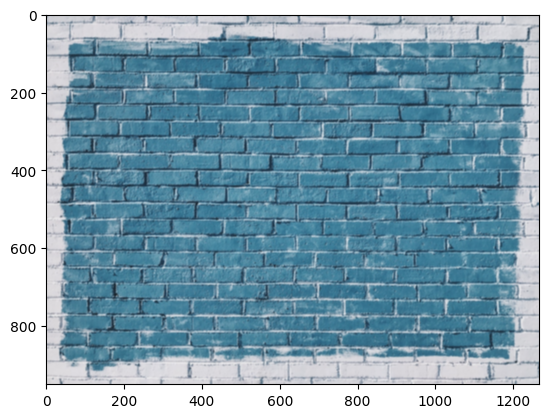

In [71]:
dst = cv2.filter2D(img, -1, kernel)
plt.imshow(dst)

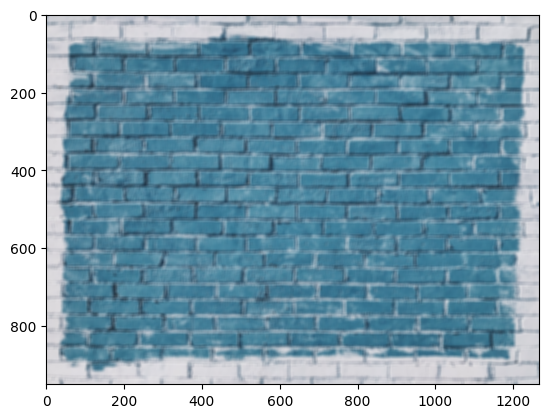

In [72]:
blurred = cv2.blur(img, ksize=(10,10))
plt.imshow(blurred)

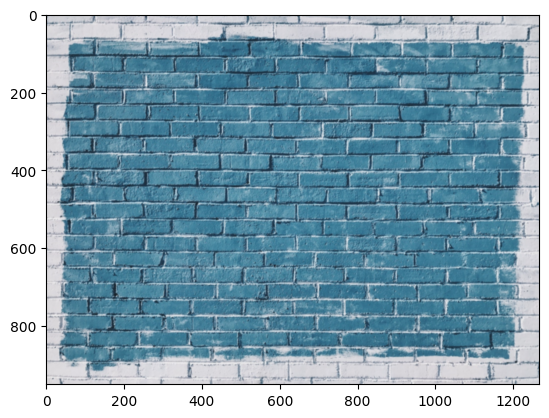

In [73]:
# Gaussian Blur
blurred_img = cv2.GaussianBlur(img, (5,5), 0)
plt.imshow(blurred_img)

##Threshold

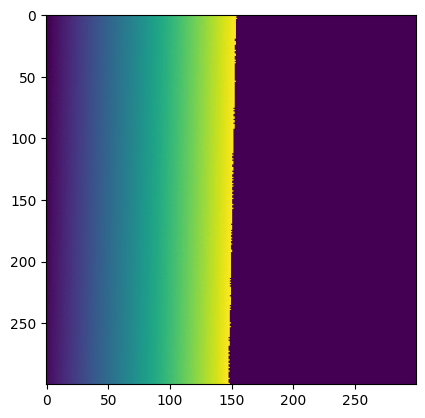

In [74]:
img = cv2.imread('./DATA/gradient.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY); # 轉換前，都先將圖片轉換成灰階色彩
ret, output1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)     # 如果大於 127 就等於 255，反之等於 0。
ret, output2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV) # 如果大於 127 就等於 0，反之等於 255。
ret, output3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)      # 如果大於 127 就等於 127，反之數值不變。
ret, output4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO)     # 如果大於 127 數值不變，反之數值等於 0。
ret, output5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV) # 如果大於 127 等於 0，反之數值不變。
plt.imshow(output5)

In [75]:
img = cv2.imread('./DATA/dige.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY); # 轉換前，都先將圖片轉換成灰階色彩

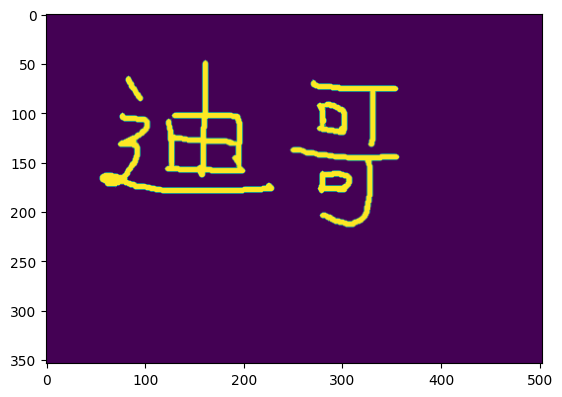

In [76]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

img_out = cv2.erode(img_gray, kernel)     # 先侵蝕，將白色小圓點移除
plt.imshow(img_out)

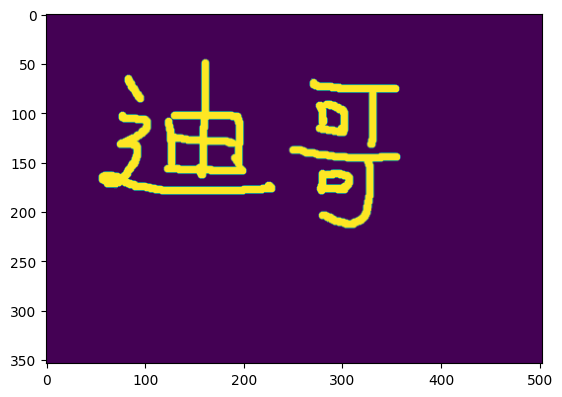

In [77]:
img_back = cv2.dilate(img_out, kernel)    # 再膨脹，白色小點消失
plt.imshow(img_back)

##edges

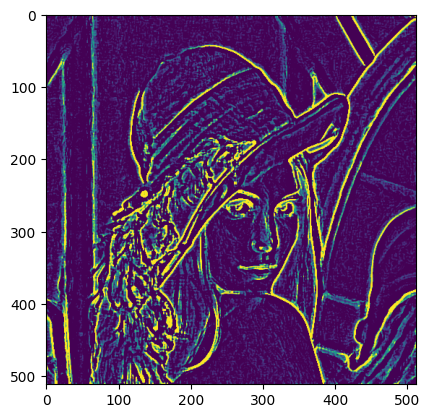

In [78]:
img = cv2.imread('./DATA/Lenna.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 轉成灰階
img = cv2.medianBlur(img, 7)                 # 模糊化，去除雜訊
output = cv2.Laplacian(img, -1, 1, 5)        # 偵測邊緣
plt.imshow(output)

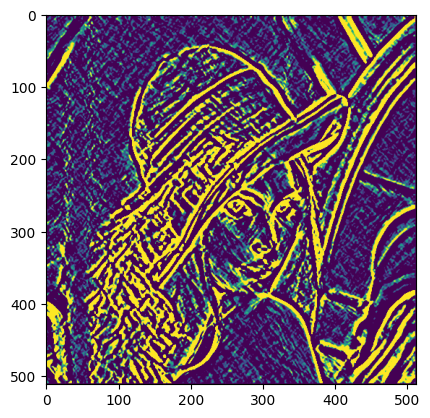

In [79]:
img = cv2.imread('./DATA/Lenna.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 轉成灰階
img = cv2.medianBlur(img, 7)                 # 模糊化，去除雜訊
output = cv2.Sobel(img, -1, 1, 1, 1, 7)      # 偵測邊緣
plt.imshow(output)

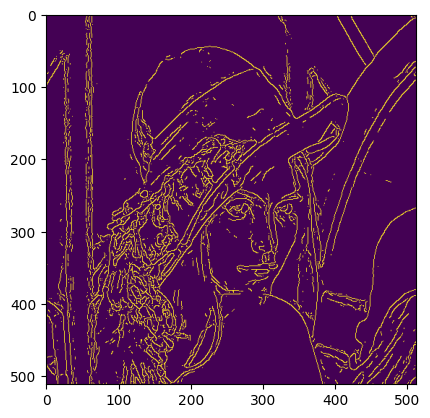

In [80]:
img = cv2.imread('./DATA/Lenna.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 轉成灰階
img = cv2.medianBlur(img, 7)                 # 模糊化，去除雜訊
output = cv2.Canny(img, 36, 36)              # 偵測邊緣
plt.imshow(output)

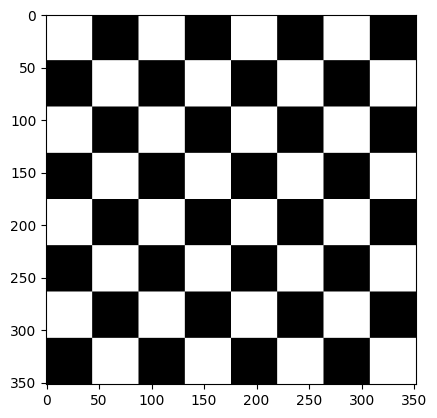

In [81]:
flat_chess = cv2.imread('./DATA/flat_chessboard.png')
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess, cmap='gray')

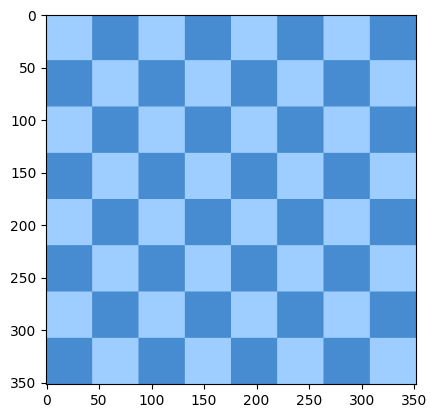

In [82]:
# Harris Corner Detection Algorithm
dst = cv2.cornerHarris(src=gray_flat_chess, blockSize=2, ksize=3, k=0.04)
# Needed to show the results
dst = cv2.dilate(dst, None)
# Whenever our HCA is greater than 10 % of our max value, set it to red (for visualization)
plt.imshow(flat_chess)

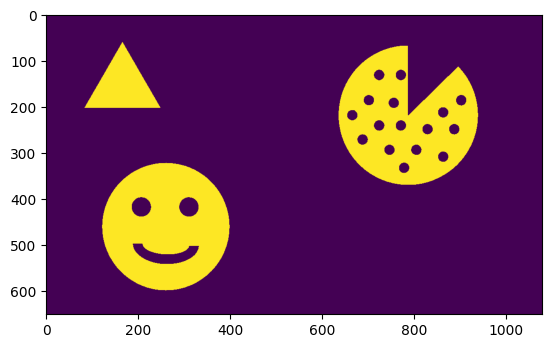

In [83]:
# finding contours
img = cv2.imread('./DATA/internal_external.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
plt.imshow(thresh)

In [84]:
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

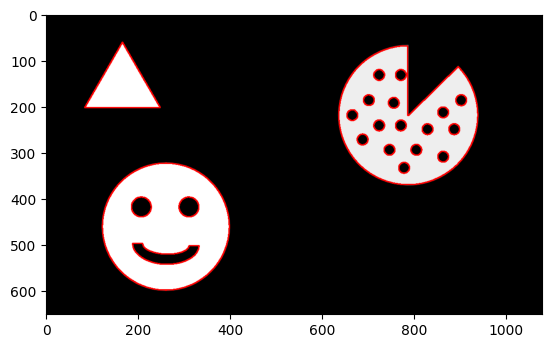

In [85]:
# drawing contours
img2 = img.copy()
res = cv2.drawContours(img2, contours, -1, (255,0,0), 2)
plt.imshow(res)

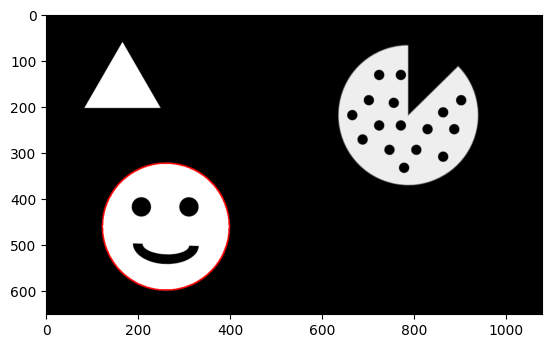

In [86]:
# drawing contours
img2 = img.copy()
res = cv2.drawContours(img2, contours, 0, (255,0,0), 2)
plt.imshow(res)

In [87]:
cnt = contours[0]

In [88]:
cv2.contourArea(cnt)

59849.5

In [89]:
cv2.arcLength(cnt,True)

916.4478269815445

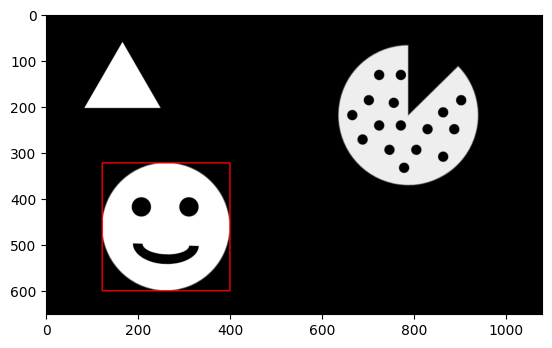

In [90]:
img = cv2.imread('./DATA/internal_external.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
cnt = contours[0]
x,y,w,h = cv2.boundingRect(cnt)
res = cv2.rectangle(img, (x,y),(x+w, y+h), (255,0,0), 2)
plt.imshow(res)

In [91]:
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w * h
percent = float(area)/rect_area
print("percentage:", percent)

percentage: 0.7744099684281351


In [92]:
reeses = cv2.imread('./DATA/reeses_puffs.png', 0)

In [93]:
cereals = cv2.imread('./DATA/many_cereals.jpg', 0)

In [102]:
# Scale Invariant Feature Transfer (SIFT) Descriptors
sift = cv2.SIFT_create()

In [103]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [104]:
bf = cv2.BFMatcher()

In [105]:
matches = bf.knnMatch(des1, des2, k=2)

In [117]:
# Less distance == better match
good = []

for match1, match2 in matches:
    # If match 1 distance is less than 75% of match 2 distance
    # then descriptor for that row is a good match, keep it
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [118]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

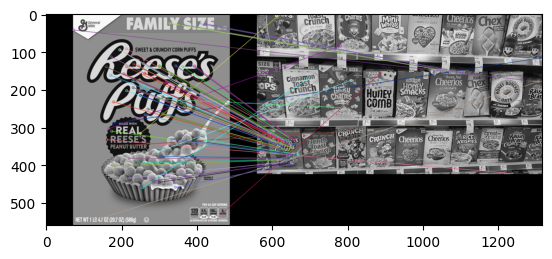

In [119]:
plt.imshow(sift_matches, cmap='gray')